In [72]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
import cv2
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from skimage.transform import resize
from albumentations import Rotate, RandomCrop, RandomBrightnessContrast, RandomBrightness, RandomContrast, RandomSizedCrop, RandomGamma, GaussNoise, Compose, Flip, HorizontalFlip

In [80]:
class RetinaDataset(Dataset):
    
    def __init__(self, file_path, transforms=None):
        self.image_list = os.listdir(os.getcwd() + file_path)
        self.root_dir = os.getcwd()+file_path
        if transforms != None:
            self.transforms = Compose(transforms)
        else:
            self.transforms = transforms
    
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.image_list[idx])

        image = cv2.imread(img_name)

        image = {'image':cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)}
        #landmarks = self.landmarks_frame.iloc[idx, 1:]
        #landmarks = np.array([landmarks])
        #landmarks = landmarks.astype('float').reshape(-1, 2)
        if self.transforms:
            image = self.transforms(image = image['image'])
        image = {'image':resize(image['image'], [768, 768], anti_aliasing=True)}
        return image

(768, 768)
[[0.35686275 0.36078431 0.35294118 ... 0.29411765 0.29411765 0.29019608]
 [0.37254902 0.35686275 0.35686275 ... 0.29803922 0.30196078 0.29411765]
 [0.37254902 0.34117647 0.36862745 ... 0.29803922 0.30196078 0.29803922]
 ...
 [0.34509804 0.36078431 0.36862745 ... 0.35294118 0.35294118 0.34901961]
 [0.34901961 0.36078431 0.36078431 ... 0.35294118 0.34901961 0.34509804]
 [0.34901961 0.36078431 0.36862745 ... 0.34901961 0.34509804 0.34509804]]


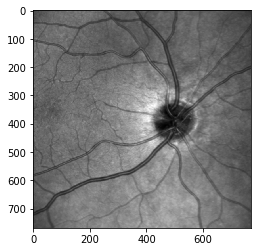

In [82]:
test = RetinaDataset(file_path="/data/targets")
sample = test[0]
print(sample['image'].shape)
print(sample['image'])
plt.imshow(sample['image'], cmap='gray')
plt.show()

[[0.50588235 0.49803922 0.49019608 ... 0.4745098  0.4745098  0.47843137]
 [0.50588235 0.49803922 0.49411765 ... 0.48235294 0.48235294 0.48627451]
 [0.50588235 0.50196078 0.49411765 ... 0.48627451 0.49019608 0.49803922]
 ...
 [0.48235294 0.48627451 0.48627451 ... 0.58431373 0.57647059 0.57254902]
 [0.4745098  0.48627451 0.49411765 ... 0.57647059 0.57254902 0.56862745]
 [0.4745098  0.48627451 0.49803922 ... 0.56862745 0.57254902 0.57254902]]


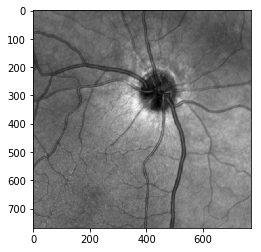

In [83]:
#Show rotation augmentation
test = RetinaDataset(file_path="/data/targets", transforms=[Rotate(p=1)])
sample = test[0]
print(sample['image'])
plt.imshow(sample['image'], cmap='gray')
plt.show()

[[0.70814233 0.71362448 0.70383492 ... 0.46446078 0.46752451 0.46580882]
 [0.70333037 0.70918783 0.69872808 ... 0.46617647 0.4692402  0.46752451]
 [0.71192316 0.71711043 0.70784745 ... 0.46311275 0.46617647 0.46446078]
 ...
 [0.59995141 0.59864454 0.60097824 ... 0.41960784 0.41807598 0.41893382]
 [0.60195001 0.60030805 0.60324013 ... 0.42113971 0.41960784 0.42046569]
 [0.6008308  0.59937648 0.60197347 ... 0.42028186 0.41875    0.41960784]]


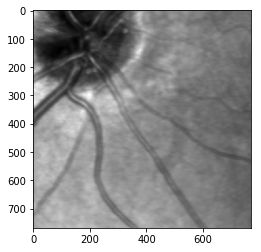

In [84]:
#Show cropping augmentation
test = RetinaDataset(file_path="/data/targets", transforms=[RandomCrop(p=1, height=300, width=300)])
sample = test[0]
print(sample['image'])
plt.imshow(sample['image'], cmap='gray')
plt.show()

[[0.48235294 0.4745098  0.4745098  ... 0.41960784 0.42352941 0.43137255]
 [0.48235294 0.4745098  0.4745098  ... 0.42352941 0.43137255 0.43921569]
 [0.48235294 0.47843137 0.47843137 ... 0.43137255 0.44313725 0.45098039]
 ...
 [0.55294118 0.55686275 0.56078431 ... 0.5254902  0.51764706 0.51372549]
 [0.55686275 0.55686275 0.56078431 ... 0.52941176 0.52156863 0.52156863]
 [0.56470588 0.56470588 0.56862745 ... 0.5254902  0.52156863 0.52156863]]


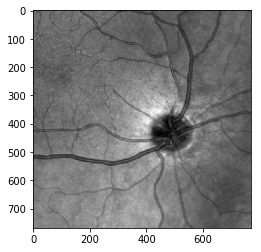

In [86]:
#Show cropping and rotation with low probability
test = RetinaDataset(file_path="/data/targets", transforms=[Rotate(p=0.5), RandomCrop(p=0.5, height=300, width=300)])
sample = test[0]
print(sample['image'])
plt.imshow(sample['image'], cmap='gray')
plt.show()